In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Run this in its own cell
print("--- Installing/Upgrading Qiskit packages ---")
!pip install --upgrade qiskit qiskit-aer qiskit-experiments qiskit-ibm-runtime matplotlib
print("--- Installation Complete ---")


--- Installing/Upgrading Qiskit packages ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 62.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.8/628.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 80.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/7

# Step 1: Generate Training Data & Classical Baseline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.2/616.2 kB 14.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.7 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.3 which is incompatible.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 9.6.0 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 

base_primitive._run:INFO:2025-10-28 09:08:28,192: Submitting job using options {'options': {'default_shots': 1024, 'simulator': {'seed_simulator': 42}, 'execution': {'meas_type': 'classified'}}, 'version': 2, 'support_qiskit': True}


Running NOISY simulation (using FakeVigo)…


base_primitive._run:INFO:2025-10-28 09:08:29,034: Submitting job using options {'options': {'default_shots': 1024, 'simulator': {'seed_simulator': 42}, 'execution': {'meas_type': 'classified'}}, 'version': 2, 'support_qiskit': True}


Simulations complete.

--- Step 3: Analyzing Tomography Results (Classical Baseline) ---
Target Density Matrix (rho_target):
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Noisy Reconstructed (rho_noisy):
[[0.515+0.j    0.418-0.032j]
 [0.418+0.032j 0.485+0.j   ]]

--- Baseline Fidelity Scores ---
Noiseless Fidelity: 0.999813
Noisy Fidelity:     0.917969  <-- THIS IS THE SCORE TO BEAT

--- Step 4: Extracting Data for DDM Training ---

Training Data (Counts from Noisy Sim):
Extracted 3 'counts' objects and sorted by basis.
  Basis X: {'0': 940, '1': 84}
  Basis Y: {'0': 545, '1': 479}
  Basis Z: {'1': 497, '0': 527}

--- Step 5: Visualizing Results ---
Displaying Bloch Sphere visualizations…
Plotting Target State Bloch Sphere...


/tmp/ipykernel_37/2087148372.py:84: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  noiseless_rho = noiseless_data.analysis_results("state").value
/tmp/ipykernel_37/2087148372.py:85: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  noisy_rho = noisy_data.analysis_results("state").value


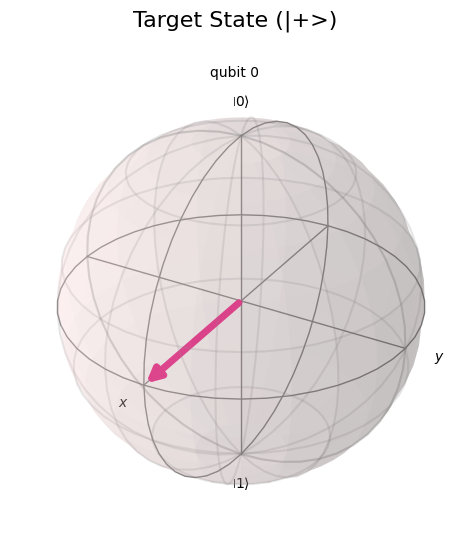

Plotting Noisy Reconstructed Bloch Sphere...


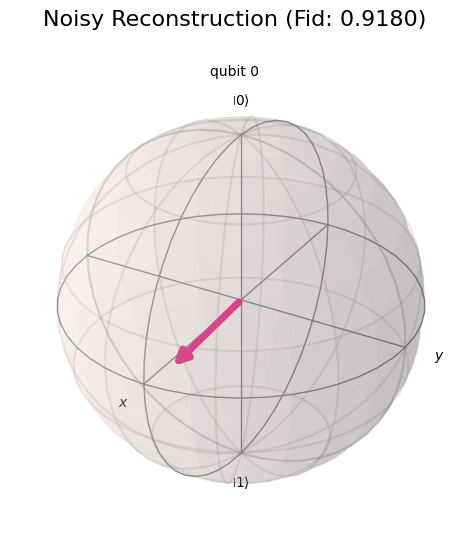

Displaying Density Matrix 'City' plots…
Plotting Target Density Matrix...


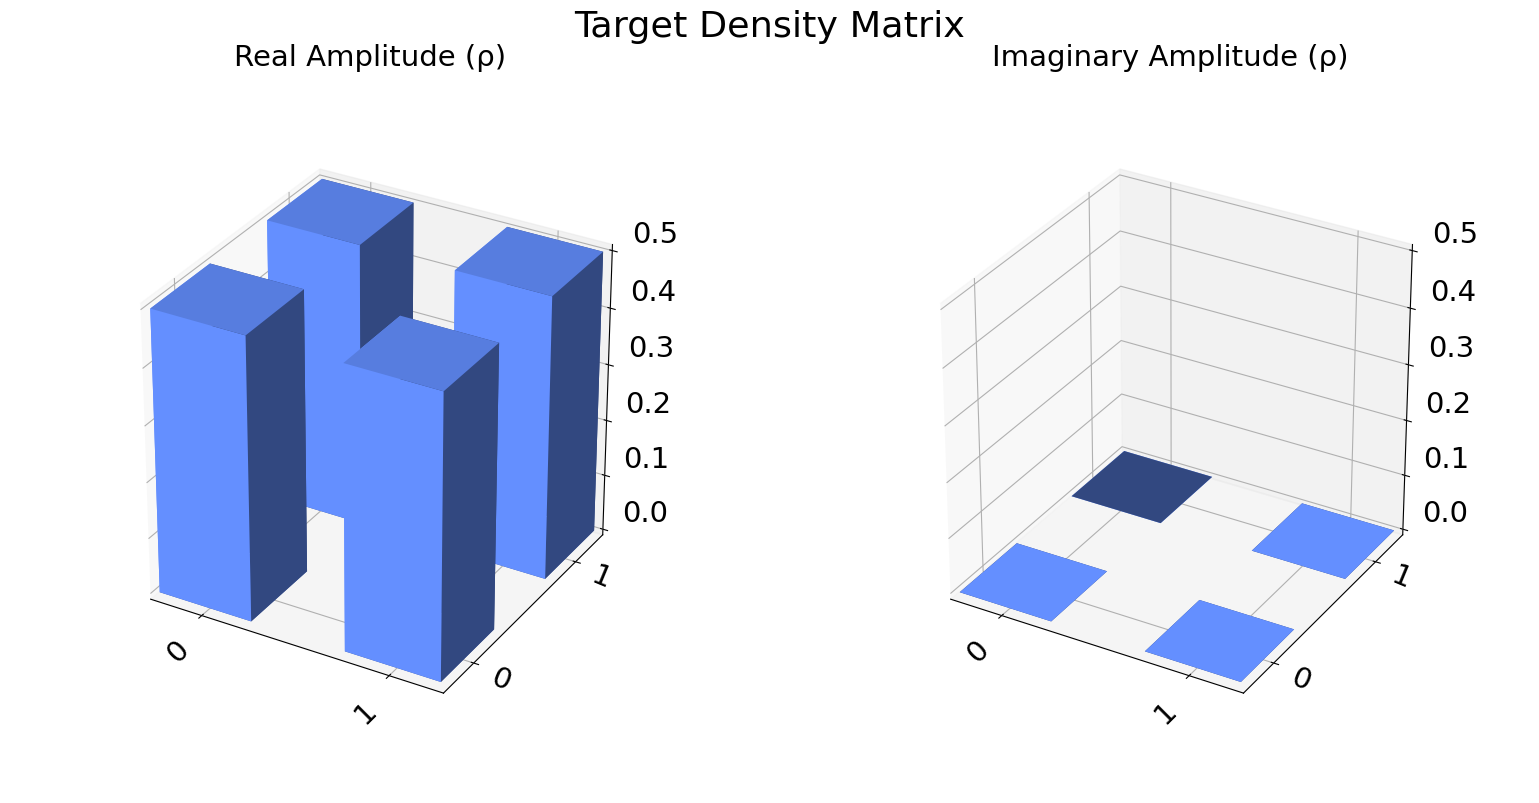

Plotting Noisy Reconstructed Density Matrix...


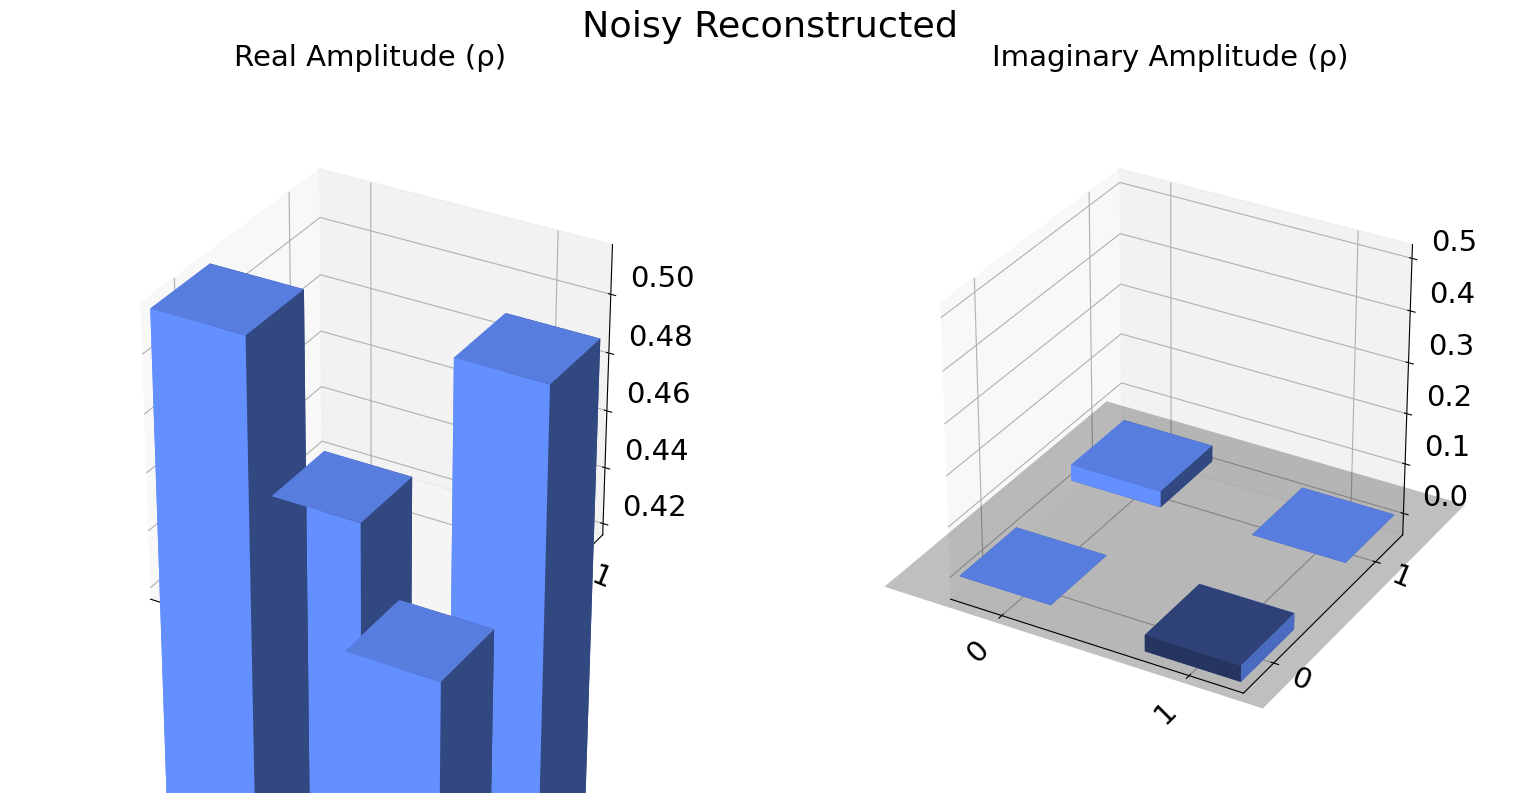


All visualizations complete.

Next step: Copy the 'Basis X/Y/Z' counts into the Step 2 DDM script.


In [3]:
# --- Installation ---
# Run this once at the top of your notebook.
# You may need to restart the runtime after installation.
!pip install --upgrade --quiet qiskit qiskit-aer qiskit-experiments qiskit-ibm-runtime matplotlib ipython

# --- Python Code ---
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Qiskit Core
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity, DensityMatrix

# Qiskit Aer for simulation
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Qiskit Experiments for Tomography
from qiskit_experiments.library import StateTomography

# Fake-backend (for realistic noise model)
from qiskit_ibm_runtime.fake_provider import FakeVigoV2

# Qiskit visualization utilities
from qiskit.visualization import plot_state_city, plot_bloch_multivector

def main():
    """
    Runs a 1-qubit state tomography experiment to establish a baseline.
    Generates noisy 'counts' data and correctly labels them 'X', 'Y', 'Z'
    by inspecting the gates in each circuit.
    """

    print("--- Step 1: Setting up Experiment ---")

    # 1. Define the target quantum state.
    target_state = Statevector.from_label('+')
    print(f"Target state |+> = {np.round(target_state.data, 3)}")

    # 2. Define simulators
    noiseless_sim = AerSimulator()
    print("Loading FakeVigo backend…")
    fake_backend = FakeVigoV2()
    noise_model = NoiseModel.from_backend(fake_backend)

    # 3. Build a noisy simulator
    noisy_sim = AerSimulator(
        noise_model = noise_model,
        coupling_map = fake_backend.configuration().coupling_map,
        basis_gates  = noise_model.basis_gates
    )
    print("Simulators created.")

    # 3. Setup the tomography experiment
    qst_exp = StateTomography(target_state, measurement_indices=[0])

    shots_per_basis = 1024
    print(f"\nRunning StateTomography for 1-qubit state on 3 bases.")
    print(f"Shots per basis: {shots_per_basis}")

    # --- Step 2: Run the experiments ---
    print("\n--- Step 2: Running Simulations ---")

    print("Running NOISELESS simulation...")
    noiseless_data = qst_exp.run(
        noiseless_sim,
        shots=shots_per_basis,
        seed_simulator=42
    ).block_for_results()

    print("Running NOISY simulation (using FakeVigo)…")
    noisy_data = qst_exp.run(
        noisy_sim,
        shots=shots_per_basis,
        seed_simulator=42
    ).block_for_results()

    print("Simulations complete.")

    # --- Step 3: Analyze tomography results ---
    print("\n--- Step 3: Analyzing Tomography Results (Classical Baseline) ---")

    noiseless_rho = noiseless_data.analysis_results("state").value
    noisy_rho = noisy_data.analysis_results("state").value

    noiseless_fid = state_fidelity(target_state, noiseless_rho)
    noisy_fid     = state_fidelity(target_state, noisy_rho)

    print(f"Target Density Matrix (rho_target):\n{DensityMatrix(target_state).data}")
    print(f"\nNoisy Reconstructed (rho_noisy):\n{np.round(noisy_rho.data, 3)}")

    print("\n--- Baseline Fidelity Scores ---")
    print(f"Noiseless Fidelity: {noiseless_fid:.6f}")
    print(f"Noisy Fidelity:     {noisy_fid:.6f}  <-- THIS IS THE SCORE TO BEAT")


    # --- Step 4: Extract training data for DDM (GATE INSPECTION FIX) ---
    print("\n--- Step 4: Extracting Data for DDM Training ---")

    # The experiment data (results)
    circuit_data = noisy_data.data()
    # The circuits that were run
    experiment_circuits = qst_exp.circuits()
    counts_by_basis = {}

    if len(circuit_data) != len(experiment_circuits):
        print("Error: Mismatch between number of circuits and results.")
    else:
        # Loop through both lists in parallel
        for circuit, result_data in zip(experiment_circuits, circuit_data):
            counts = result_data.get('counts')

            # Get the names of the gates in the circuit
            # We remove 'barrier', 'save_expval', and 'measure' to find the basis gates
            gate_names = set(
                instr.operation.name 
                for instr in circuit.data 
                if instr.operation.name not in ['barrier', 'save_expval', 'measure', 'reset']
            )

            # Now we identify the basis by the gates present
            basis_label = '?'
        
            # Correct check for the measurement basis gates
            if 'PauliMeasX' in gate_names:
                basis_label = 'X'
            elif 'PauliMeasY' in gate_names:
                basis_label = 'Y'
            elif 'PauliMeasZ' in gate_names:
                basis_label = 'Z'
            else:
                print(f"Warning: Could not identify basis from gates: {gate_names}")

            if basis_label != '?':
                counts_by_basis[basis_label] = counts
            else:
                print(f"Warning: Failed to assign basis for circuit {circuit.name}")

    print("\nTraining Data (Counts from Noisy Sim):")
    print(f"Extracted {len(counts_by_basis)} 'counts' objects and sorted by basis.")

    # Ensure all bases are present, even if empty, and print in X, Y, Z order
    all_noisy_counts = []
    for basis in ['X', 'Y', 'Z']:
        # Ensure counts are not None before processing
        counts = counts_by_basis.get(basis)
        if counts is None:
            print(f"Warning: No counts found for basis {basis}. Defaulting to empty.")
            counts = {'0': 0, '1': 0}
        
        all_noisy_counts.append(counts)
        print(f"  Basis {basis}: {counts}")


     # --- Step 5: Visualizing Results ---
    print("\n--- Step 5: Visualizing Results ---")
    
    print("Displaying Bloch Sphere visualizations…")
    
    print("Plotting Target State Bloch Sphere...")
    display(plot_bloch_multivector(target_state, title="Target State (|+>)"))

    print("Plotting Noisy Reconstructed Bloch Sphere...")
    display(plot_bloch_multivector(noisy_rho, title=f"Noisy Reconstruction (Fid: {noisy_fid:.4f})"))

    print("Displaying Density Matrix 'City' plots…")
    
    print("Plotting Target Density Matrix...")
    display(plot_state_city(target_state,
                    title="Target Density Matrix"))
    
    print("Plotting Noisy Reconstructed Density Matrix...")
    display(plot_state_city(noisy_rho,
                    title="Noisy Reconstructed"))

    print("\nAll visualizations complete.")
    print("\nNext step: Copy the 'Basis X/Y/Z' counts into the Step 2 DDM script.")


if __name__ == "__main__":
    main()



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.7 which is incompatible.
bigframes 2.12.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.1.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
--- Step 1: Setting up Experiment ---
Target state |+> = [0.707+0.j 0.707+0.j]
Loading FakeVigo backend…
Simulators created.

Running StateTomography for 1-qubit state on 3 bases.
Shots per basis: 4096

--- Step 2: Running Simulations ---
Running NOISELESS simulation...


base_primitive._run:INFO:2025-10-28 09:08:41,615: Submitting job using options {'options': {'default_shots': 4096, 'simulator': {'seed_simulator': 42}, 'execution': {'meas_type': 'classified'}}, 'version': 2, 'support_qiskit': True}


Running NOISY simulation (using FakeVigo)…


base_primitive._run:INFO:2025-10-28 09:08:42,811: Submitting job using options {'options': {'default_shots': 4096, 'simulator': {'seed_simulator': 42}, 'execution': {'meas_type': 'classified'}}, 'version': 2, 'support_qiskit': True}


Simulations complete.

--- Step 3: Analyzing Tomography Results (Classical Baseline) ---
Target Density Matrix (rho_target):
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Noisy Reconstructed (rho_noisy):
[[0.495+0.j    0.424-0.025j]
 [0.424+0.025j 0.505+0.j   ]]

--- Baseline Fidelity Scores ---
Noiseless Fidelity: 0.999850
Noisy Fidelity:     0.924072  <-- THIS IS THE SCORE TO BEAT

--- Step 4: Extracting Data for DDM Training ---

Training Data (Counts from Noisy Sim):
Extracted 3 'counts' objects and sorted by basis.
  Basis X: {'0': 3785, '1': 311}
  Basis Y: {'0': 2152, '1': 1944}
  Basis Z: {'1': 2067, '0': 2029}

--- Step 5: Visualizing Results ---
Displaying Bloch Sphere visualizations…
Plotting Target State Bloch Sphere...


/tmp/ipykernel_37/3890033925.py:85: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  noiseless_rho = noiseless_data.analysis_results("state").value
/tmp/ipykernel_37/3890033925.py:86: DeprecationWarning: Leaving `dataframe` unset or setting it to `False` for `ExperimentData.analysis_results` is deprecated as of qiskit-experiments 0.9.0. Future releases may change the default to `True` and remove the option to set the value to `False`.
  noisy_rho = noisy_data.analysis_results("state").value


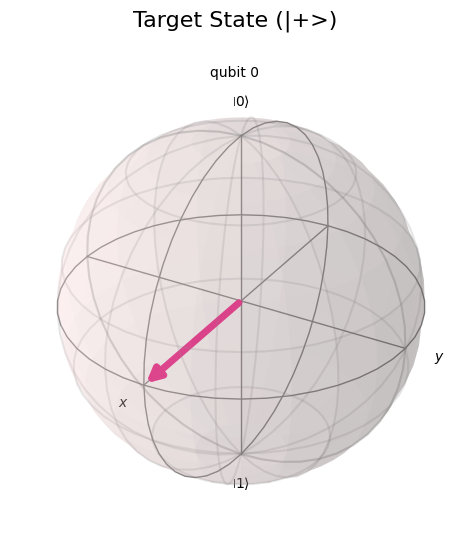

Plotting Noisy Reconstructed Bloch Sphere...


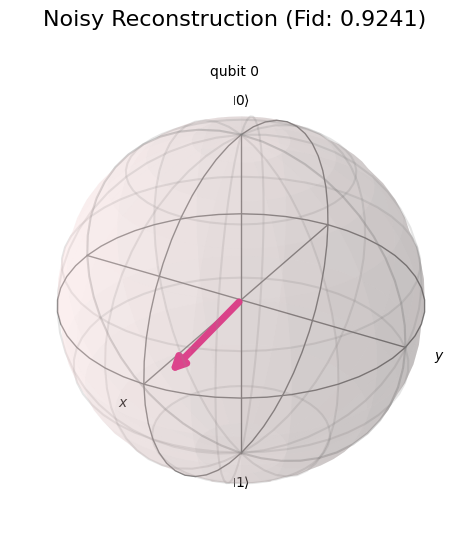

Displaying Density Matrix 'City' plots…
Plotting Target Density Matrix...


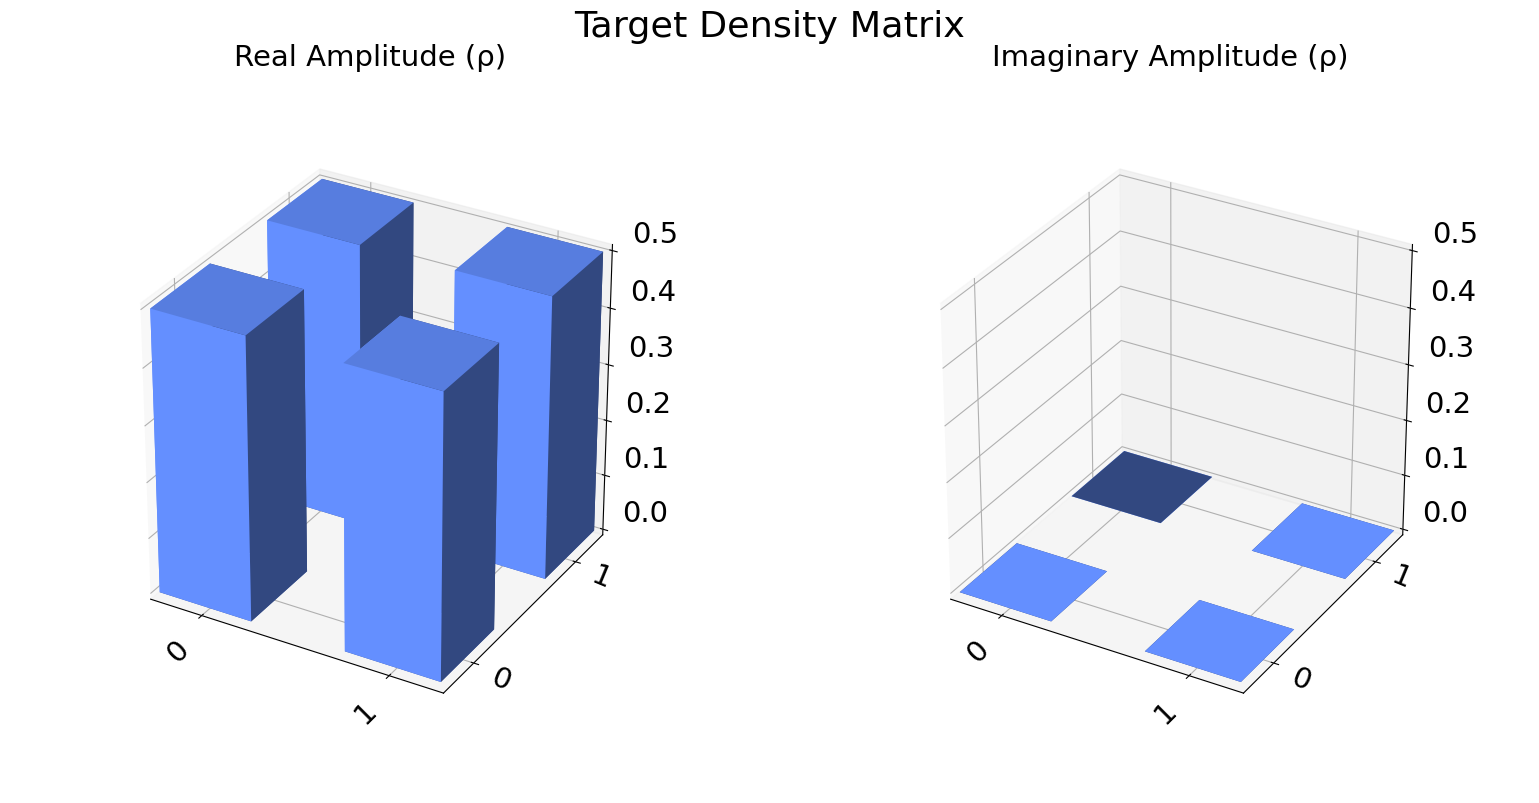

Plotting Noisy Reconstructed Density Matrix...


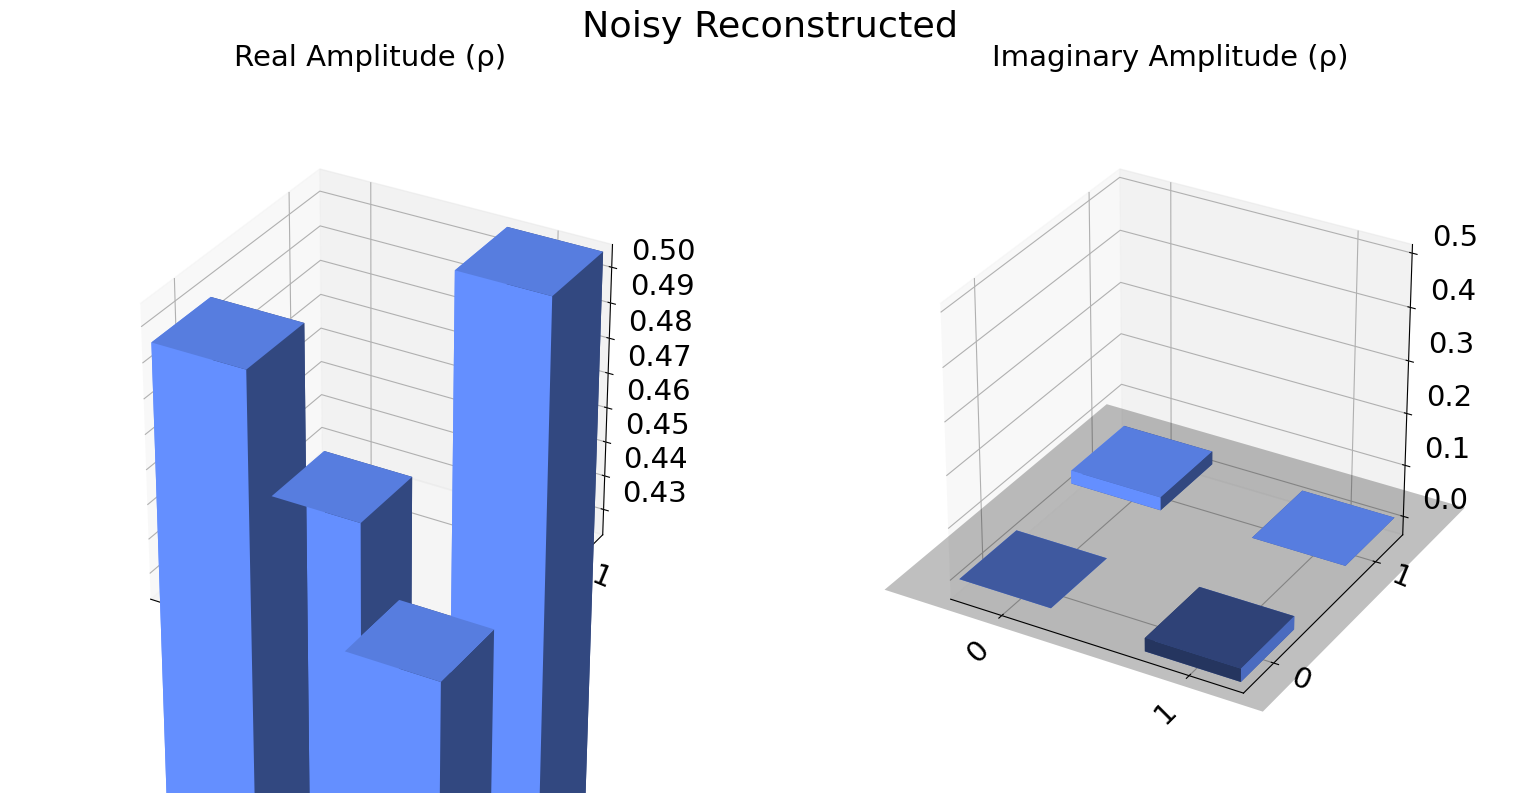


All visualizations complete.

Next step: Copy the 'Basis X/Y/Z' counts into the Step 2 DDM script.


In [4]:
#shots = 4096 case
# --- Installation ---
# Run this once at the top of your notebook.
# You may need to restart the runtime after installation.
!pip install --upgrade --quiet qiskit qiskit-aer qiskit-experiments qiskit-ibm-runtime matplotlib ipython

# --- Python Code ---
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Qiskit Core
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, state_fidelity, DensityMatrix

# Qiskit Aer for simulation
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

# Qiskit Experiments for Tomography
from qiskit_experiments.library import StateTomography

# Fake-backend (for realistic noise model)
from qiskit_ibm_runtime.fake_provider import FakeVigoV2

# Qiskit visualization utilities
from qiskit.visualization import plot_state_city, plot_bloch_multivector

def main():
    """
    Runs a 1-qubit state tomography experiment to establish a baseline.
    Generates noisy 'counts' data and correctly labels them 'X', 'Y', 'Z'
    by inspecting the gates in each circuit.
    """

    print("--- Step 1: Setting up Experiment ---")

    # 1. Define the target quantum state.
    target_state = Statevector.from_label('+')
    print(f"Target state |+> = {np.round(target_state.data, 3)}")

    # 2. Define simulators
    noiseless_sim = AerSimulator()
    print("Loading FakeVigo backend…")
    fake_backend = FakeVigoV2()
    noise_model = NoiseModel.from_backend(fake_backend)

    # 3. Build a noisy simulator
    noisy_sim = AerSimulator(
        noise_model = noise_model,
        coupling_map = fake_backend.configuration().coupling_map,
        basis_gates  = noise_model.basis_gates
    )
    print("Simulators created.")

    # 3. Setup the tomography experiment
    qst_exp = StateTomography(target_state, measurement_indices=[0])

    shots_per_basis = 4096
    print(f"\nRunning StateTomography for 1-qubit state on 3 bases.")
    print(f"Shots per basis: {shots_per_basis}")

    # --- Step 2: Run the experiments ---
    print("\n--- Step 2: Running Simulations ---")

    print("Running NOISELESS simulation...")
    noiseless_data = qst_exp.run(
        noiseless_sim,
        shots=shots_per_basis,
        seed_simulator=42
    ).block_for_results()

    print("Running NOISY simulation (using FakeVigo)…")
    noisy_data = qst_exp.run(
        noisy_sim,
        shots=shots_per_basis,
        seed_simulator=42
    ).block_for_results()

    print("Simulations complete.")

    # --- Step 3: Analyze tomography results ---
    print("\n--- Step 3: Analyzing Tomography Results (Classical Baseline) ---")

    noiseless_rho = noiseless_data.analysis_results("state").value
    noisy_rho = noisy_data.analysis_results("state").value

    noiseless_fid = state_fidelity(target_state, noiseless_rho)
    noisy_fid     = state_fidelity(target_state, noisy_rho)

    print(f"Target Density Matrix (rho_target):\n{DensityMatrix(target_state).data}")
    print(f"\nNoisy Reconstructed (rho_noisy):\n{np.round(noisy_rho.data, 3)}")

    print("\n--- Baseline Fidelity Scores ---")
    print(f"Noiseless Fidelity: {noiseless_fid:.6f}")
    print(f"Noisy Fidelity:     {noisy_fid:.6f}  <-- THIS IS THE SCORE TO BEAT")


    # --- Step 4: Extract training data for DDM (GATE INSPECTION FIX) ---
    print("\n--- Step 4: Extracting Data for DDM Training ---")

    # The experiment data (results)
    circuit_data = noisy_data.data()
    # The circuits that were run
    experiment_circuits = qst_exp.circuits()
    counts_by_basis = {}

    if len(circuit_data) != len(experiment_circuits):
        print("Error: Mismatch between number of circuits and results.")
    else:
        # Loop through both lists in parallel
        for circuit, result_data in zip(experiment_circuits, circuit_data):
            counts = result_data.get('counts')

            # Get the names of the gates in the circuit
            # We remove 'barrier', 'save_expval', and 'measure' to find the basis gates
            gate_names = set(
                instr.operation.name 
                for instr in circuit.data 
                if instr.operation.name not in ['barrier', 'save_expval', 'measure', 'reset']
            )

            # Now we identify the basis by the gates present
            basis_label = '?'
        
            # Correct check for the measurement basis gates
            if 'PauliMeasX' in gate_names:
                basis_label = 'X'
            elif 'PauliMeasY' in gate_names:
                basis_label = 'Y'
            elif 'PauliMeasZ' in gate_names:
                basis_label = 'Z'
            else:
                print(f"Warning: Could not identify basis from gates: {gate_names}")

            if basis_label != '?':
                counts_by_basis[basis_label] = counts
            else:
                print(f"Warning: Failed to assign basis for circuit {circuit.name}")

    print("\nTraining Data (Counts from Noisy Sim):")
    print(f"Extracted {len(counts_by_basis)} 'counts' objects and sorted by basis.")

    # Ensure all bases are present, even if empty, and print in X, Y, Z order
    all_noisy_counts = []
    for basis in ['X', 'Y', 'Z']:
        # Ensure counts are not None before processing
        counts = counts_by_basis.get(basis)
        if counts is None:
            print(f"Warning: No counts found for basis {basis}. Defaulting to empty.")
            counts = {'0': 0, '1': 0}
        
        all_noisy_counts.append(counts)
        print(f"  Basis {basis}: {counts}")


     # --- Step 5: Visualizing Results ---
    print("\n--- Step 5: Visualizing Results ---")
    
    print("Displaying Bloch Sphere visualizations…")
    
    print("Plotting Target State Bloch Sphere...")
    display(plot_bloch_multivector(target_state, title="Target State (|+>)"))

    print("Plotting Noisy Reconstructed Bloch Sphere...")
    display(plot_bloch_multivector(noisy_rho, title=f"Noisy Reconstruction (Fid: {noisy_fid:.4f})"))

    print("Displaying Density Matrix 'City' plots…")
    
    print("Plotting Target Density Matrix...")
    display(plot_state_city(target_state,
                    title="Target Density Matrix"))
    
    print("Plotting Noisy Reconstructed Density Matrix...")
    display(plot_state_city(noisy_rho,
                    title="Noisy Reconstructed"))

    print("\nAll visualizations complete.")
    print("\nNext step: Copy the 'Basis X/Y/Z' counts into the Step 2 DDM script.")


if __name__ == "__main__":
    main()



# Step 2: DDM

In [13]:

# --- Python Code ---
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import numpy as np
import collections

# --- Step 1: Paste Your Data Here ---
# TODO:
# Copy the *actual* output from your Step 1 script and paste it below.
# The basis order MUST be X, Y, Z.

'''`
Training Data (Counts from Noisy Sim):
Extracted 3 'counts' objects and sorted by basis.
  Basis X: {'0': 940, '1': 84}
  Basis Y: {'0': 545, '1': 479}
  Basis Z: {'1': 497, '0': 527}
'''


counts_X = {'0': 940, '1': 84}  # <-- PASTE YOUR X COUNTS (from Basis ('X',))
counts_Y = {'0': 545, '1': 479}  # <-- PASTE YOUR Y COUNTS (from Basis ('Y',))
counts_Z = {'1': 497, '0': 527} # <-- PASTE YOUR Z COUNTS (from Basis ('Z',))



# --- This script continues from here ---
original_noisy_counts = [counts_X, counts_Y, counts_Z]
BASIS_LABELS = ['X', 'Y', 'Z']

# --- Step 2a: Process Data for ML ---

class BitstringDataset(Dataset):
    """
    Takes a Qiskit Counts dictionary and "unrolls" it into
    a list of individual bitstrings (shots) for training.
    """
    def __init__(self, counts_dict, basis_id):
        self.basis_id = basis_id
        self.data = []

        # Unroll the counts
        for bit_str, num_shots in counts_dict.items():
            # For 1Q, bit_str is '0' or '1'. We convert to int 0 or 1.
            if num_shots > 0:
                bit_val = int(bit_str)
                # Add this bit 'num_shots' times
                self.data.extend([bit_val] * num_shots)
        
        # Convert to a tensor
        self.data = torch.tensor(self.data, dtype=torch.long)
        self.basis_tensor = torch.tensor(basis_id, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Return the clean bit and its basis ID
        return self.data[idx], self.basis_tensor

# --- Step 2b: Define the DDM Neural Network ---

class SimpleMLP(nn.Module):
    """
    A simple MLP to predict noise.
    It's *conditional* on the basis_id.
    """
    def __init__(self, num_timesteps=100, num_bases=3):
        super().__init__()
        
        # Embeddings for timestep and basis
        self.time_emb = nn.Embedding(num_timesteps + 1, 32) # +1 for t=0
        self.basis_emb = nn.Embedding(num_bases, 32)
        
        # Input layer: 1 (bit value) + 32 (time) + 32 (basis) = 65
        self.net = nn.Sequential(
            nn.Linear(1 + 32 + 32, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2) # Output: Logits for '0' and '1'
        )

    def forward(self, noisy_x, t, basis_id):
        # x is (batch_size, 1)
        # t is (batch_size,)
        # basis_id is (batch_size,)
        
        # Get embeddings
        t_emb = self.time_emb(t)
        b_emb = self.basis_emb(basis_id)
        
        # Reshape x from (batch_size,) to (batch_size, 1) and cast to float
        noisy_x = noisy_x.float().view(-1, 1)

        # Concatenate inputs
        x_in = torch.cat([noisy_x, t_emb, b_emb], dim=1)
        
        # Return logits (raw scores for each class)
        return self.net(x_in)

# --- Step 2c & 3: Define the Diffusion Model ---

class BitstringDDM:
    """
    Manages the DDM training (Step 2) and sampling (Step 3) process
    for categorical (binary) data.
    """
    def __init__(self, model, num_timesteps=100, device='cuda'):
        self.model = model.to(device)
        self.num_timesteps = num_timesteps
        self.device = device

        # Define the noise schedule (transition matrices)
        p_stay = torch.linspace(1.0, 0.5, num_timesteps + 1)
        
        self.Q = torch.zeros(num_timesteps + 1, 2, 2) # T, to_state, from_state
        
        for t in range(1, num_timesteps + 1):
            p = p_stay[t]
            # Q[t, 0, 0] = P(0 | 0) = p
            # Q[t, 1, 0] = P(1 | 0) = 1-p
            # Q[t, 0, 1] = P(0 | 1) = 1-p
            # Q[t, 1, 1] = P(1 | 1) = p
            self.Q[t] = torch.tensor([[p, 1-p], [1-p, p]])

        # *** BUGFIX: *** Move Q to the device (e.g., GPU)
        self.Q = self.Q.to(device)

    def forward_diffusion(self, x_0, t):
        """Adds t steps of noise to a clean bit x_0."""
        q_t = self.Q[t] # Get the (2,2) transition matrix for timestep t
        
        # *** BUGFIX: ***
        # 'q_t' is shape (2, 2).
        # 'x_0' is shape (batch_size,).
        # We need to select the correct column from q_t for each item in the batch.
        # The result 'probs' should be (batch_size, 2).
        probs = q_t[:, x_0] # This selects columns, but 't' is also a batch.
        
        # The 't' tensor is shape (batch_size,).
        # 'x_0' is shape (batch_size,).
        # We need to select Q[t_i] for each item i, then select the column x_0[i].
        
        # 1. Get the transition matrix for each 't' in the batch
        # Q_t_batch shape: (batch_size, 2, 2)
        Q_t_batch = self.Q[t]
        
        # 2. We need to select the column indexed by x_0 for each item in the batch.
        # This is a bit tricky. We can use gather.
        # Or, since it's just 2x2:
        # P(x_t | x_0=0) is Q_t_batch[:, :, 0]
        # P(x_t | x_0=1) is Q_t_batch[:, :, 1]
        
        # Create a view of x_0 for indexing
        # x_0_idx shape: (batch_size, 1, 1)
        x_0_idx = x_0.view(-1, 1, 1)
        
        # 'probs' will be (batch_size, 2)
        # We select column 0 or 1 from the (batch_size, 2, 2) tensor
        # We expand x_0_idx to (batch_size, 2, 1) to select the column
        probs = Q_t_batch.gather(dim=2, index=x_0_idx.expand(-1, 2, -1)).squeeze(2)

        # Sample x_t from the categorical distribution
        x_t = torch.multinomial(probs, num_samples=1).squeeze(1)
        return x_t.to(self.device)

    def train_step(self, x_0, basis_id):
        """Performs one training step."""
        batch_size = x_0.shape[0]
        x_0 = x_0.to(self.device)
        basis_id = basis_id.to(self.device)
        
        # 1. Sample a random timestep t
        t = torch.randint(1, self.num_timesteps + 1, (batch_size,), device=self.device)

        # 2. Create noisy x_t
        x_t = self.forward_diffusion(x_0, t)

        # 3. Get model's prediction of the *clean* state (x_0)
        pred_x_0_logits = self.model(x_t, t, basis_id)

        # 4. Calculate the loss (Cross-entropy between predicted clean and actual clean)
        loss = F.cross_entropy(pred_x_0_logits, x_0)
        return loss

    def sample(self, num_samples, basis_id):
        """(STEP 3) Generate new, denoised samples."""
        print(f"\n--- Step 3: Sampling {num_samples} bits for Basis {BASIS_LABELS[basis_id]} ---")
        
        # 1. Start with pure noise (random bits) at time T
        x_t = torch.randint(0, 2, (num_samples,), device=self.device)
        
        b_id_tensor = torch.full_like(x_t, fill_value=basis_id)
        
        # 2. Iteratively denoise from T down to 1
        for t in reversed(range(1, self.num_timesteps + 1)):
            with torch.no_grad():
                # Get model's prediction of the clean state
                t_tensor = torch.full_like(x_t, fill_value=t)
                pred_x_0_logits = self.model(x_t, t_tensor, b_id_tensor)
                
                # Convert logits to probabilities (softmax)
                pred_x_0_probs = F.softmax(pred_x_0_logits, dim=1)
                
                # Ancestral sampling step:
                # 1. Sample the predicted clean state
                x_0_pred = torch.multinomial(pred_x_0_probs, 1).squeeze(1)
                
                if t > 1:
                    # 2. Add t-1 steps of noise to it to get x_{t-1}
                    t_prev_tensor = torch.full_like(x_t, fill_value=t-1)
                    x_t = self.forward_diffusion(x_0_pred, t_prev_tensor)
                else:
                    # Last step, the final sample is our prediction
                    x_t = x_0_pred

        # 3. Return the final denoised samples
        return x_t.cpu().numpy()

# --- Main Execution ---

def run_ddm_poc():
    # --- Setup ---
    NUM_EPOCHS = 200
    BATCH_SIZE = 512
    LEARNING_RATE = 1e-3
    NUM_TIMESTEPS = 100
    
    # Use GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # --- Step 2a (Data) ---
    print("\n--- Step 2a: Processing Data ---")
    print(f"Using Original Noisy Data:")
    print(f"  X: {counts_X}")
    print(f"  Y: {counts_Y}")
    print(f"  Z: {counts_Z}")

    dataset_x = BitstringDataset(counts_X, basis_id=0)
    dataset_y = BitstringDataset(counts_Y, basis_id=1)
    dataset_z = BitstringDataset(counts_Z, basis_id=2)
    
    # Check for empty datasets
    if not dataset_x or not dataset_y or not dataset_z:
        print("\n*** ERROR: One or more datasets are empty. ***")
        print("Please re-run Step 1 and paste the correct non-empty 'counts' dictionaries.")
        return

    # Combine all 3 datasets into one
    full_dataset = ConcatDataset([dataset_x, dataset_y, dataset_z])
    dataloader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=True)
    
    # We will sample the same number of shots we trained on
    total_shots_per_basis = {
        0: len(dataset_x),
        1: len(dataset_y),
        2: len(dataset_z)
    }
    
    print(f"Total training samples (shots): {len(full_dataset)}")
    print(f"Shots per basis (for sampling): {total_shots_per_basis}")


    # --- Step 2b (Model) ---
    model = SimpleMLP(num_timesteps=NUM_TIMESTEPS, num_bases=3)
    
    # --- Step 2c (Training) ---
    print("\n--- Step 2c: Training DDM ---")
    
    ddm = BitstringDDM(model, num_timesteps=NUM_TIMESTEPS, device=device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        total_loss = 0
        for x_0, basis_id in dataloader:
            optimizer.zero_grad()
            loss = ddm.train_step(x_0, basis_id)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.6f}")

    print("--- Training Complete (Step 2 Done) ---")

    # --- Step 3: Sampling ---
    generated_counts = []
    
    for basis_id in range(3):
        # We generate the same number of samples we trained on
        num_samples = total_shots_per_basis[basis_id]
        samples = ddm.sample(num_samples=num_samples, basis_id=basis_id)
        
        # Count the bits to create a new Counts dictionary
        # Use collections.Counter to correctly handle cases where one bit is 0
        counts_counter = collections.Counter(samples)
        counts = {'0': counts_counter.get(0, 0), '1': counts_counter.get(1, 0)}
        
        generated_counts.append(counts)

    # --- Results ---
    print("\n--- Comparison: Original vs. DDM Denoised ---")
    for i in range(3):
        label = BASIS_LABELS[i]
        print(f"\nBasis {label}:")
        print(f"  Original Noisy: {original_noisy_counts[i]}")
        print(f"  DDM Denoised:   {generated_counts[i]}")

    print("\nNext step (Step 4): Reconstruct a density matrix from the 'DDM Denoised' counts.")

# Run the full Proof-of-Concept
if __name__ == "__main__":
    run_ddm_poc()



Using device: cpu

--- Step 2a: Processing Data ---
Using Original Noisy Data:
  X: {'0': 940, '1': 84}
  Y: {'0': 545, '1': 479}
  Z: {'1': 497, '0': 527}
Total training samples (shots): 3072
Shots per basis (for sampling): {0: 1024, 1: 1024, 2: 1024}

--- Step 2c: Training DDM ---
Epoch 10/200, Loss: 0.489158
Epoch 20/200, Loss: 0.452841
Epoch 30/200, Loss: 0.441924
Epoch 40/200, Loss: 0.431453
Epoch 50/200, Loss: 0.426841
Epoch 60/200, Loss: 0.413520
Epoch 70/200, Loss: 0.421294
Epoch 80/200, Loss: 0.414266
Epoch 90/200, Loss: 0.415566
Epoch 100/200, Loss: 0.424078
Epoch 110/200, Loss: 0.423143
Epoch 120/200, Loss: 0.398204
Epoch 130/200, Loss: 0.420217
Epoch 140/200, Loss: 0.410629
Epoch 150/200, Loss: 0.402849
Epoch 160/200, Loss: 0.414919
Epoch 170/200, Loss: 0.406427
Epoch 180/200, Loss: 0.414207
Epoch 190/200, Loss: 0.391979
Epoch 200/200, Loss: 0.402867
--- Training Complete (Step 2 Done) ---

--- Step 3: Sampling 1024 bits for Basis X ---

--- Step 3: Sampling 1024 bits for B

In [14]:
#4096 shots
# --- Python Code ---
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import numpy as np
import collections

# --- Step 1: Paste Your Data Here ---
# TODO:
# Copy the *actual* output from your Step 1 script and paste it below.
# The basis order MUST be X, Y, Z.

'''`

Training Data (Counts from Noisy Sim):
Extracted 3 'counts' objects and sorted by basis.
  Basis X: {'0': 3785, '1': 311}
  Basis Y: {'0': 2152, '1': 1944}
  Basis Z: {'1': 2067, '0': 2029}

'''


counts_X = {'0': 3785, '1': 311}  # <-- PASTE YOUR X COUNTS (from Basis ('X',))
counts_Y = {'0': 2152, '1': 1944}  # <-- PASTE YOUR Y COUNTS (from Basis ('Y',))
counts_Z = {'1': 2067, '0': 2029}  # <-- PASTE YOUR Z COUNTS (from Basis ('Z',))



# --- This script continues from here ---
original_noisy_counts = [counts_X, counts_Y, counts_Z]
BASIS_LABELS = ['X', 'Y', 'Z']

# --- Step 2a: Process Data for ML ---

class BitstringDataset(Dataset):
    """
    Takes a Qiskit Counts dictionary and "unrolls" it into
    a list of individual bitstrings (shots) for training.
    """
    def __init__(self, counts_dict, basis_id):
        self.basis_id = basis_id
        self.data = []

        # Unroll the counts
        for bit_str, num_shots in counts_dict.items():
            # For 1Q, bit_str is '0' or '1'. We convert to int 0 or 1.
            if num_shots > 0:
                bit_val = int(bit_str)
                # Add this bit 'num_shots' times
                self.data.extend([bit_val] * num_shots)
        
        # Convert to a tensor
        self.data = torch.tensor(self.data, dtype=torch.long)
        self.basis_tensor = torch.tensor(basis_id, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Return the clean bit and its basis ID
        return self.data[idx], self.basis_tensor

# --- Step 2b: Define the DDM Neural Network ---

class SimpleMLP(nn.Module):
    """
    A simple MLP to predict noise.
    It's *conditional* on the basis_id.
    """
    def __init__(self, num_timesteps=100, num_bases=3):
        super().__init__()
        
        # Embeddings for timestep and basis
        self.time_emb = nn.Embedding(num_timesteps + 1, 32) # +1 for t=0
        self.basis_emb = nn.Embedding(num_bases, 32)
        
        # Input layer: 1 (bit value) + 32 (time) + 32 (basis) = 65
        self.net = nn.Sequential(
            nn.Linear(1 + 32 + 32, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2) # Output: Logits for '0' and '1'
        )

    def forward(self, noisy_x, t, basis_id):
        # x is (batch_size, 1)
        # t is (batch_size,)
        # basis_id is (batch_size,)
        
        # Get embeddings
        t_emb = self.time_emb(t)
        b_emb = self.basis_emb(basis_id)
        
        # Reshape x from (batch_size,) to (batch_size, 1) and cast to float
        noisy_x = noisy_x.float().view(-1, 1)

        # Concatenate inputs
        x_in = torch.cat([noisy_x, t_emb, b_emb], dim=1)
        
        # Return logits (raw scores for each class)
        return self.net(x_in)

# --- Step 2c & 3: Define the Diffusion Model ---

class BitstringDDM:
    """
    Manages the DDM training (Step 2) and sampling (Step 3) process
    for categorical (binary) data.
    """
    def __init__(self, model, num_timesteps=100, device='cuda'):
        self.model = model.to(device)
        self.num_timesteps = num_timesteps
        self.device = device

        # Define the noise schedule (transition matrices)
        p_stay = torch.linspace(1.0, 0.5, num_timesteps + 1)
        
        self.Q = torch.zeros(num_timesteps + 1, 2, 2) # T, to_state, from_state
        
        for t in range(1, num_timesteps + 1):
            p = p_stay[t]
            # Q[t, 0, 0] = P(0 | 0) = p
            # Q[t, 1, 0] = P(1 | 0) = 1-p
            # Q[t, 0, 1] = P(0 | 1) = 1-p
            # Q[t, 1, 1] = P(1 | 1) = p
            self.Q[t] = torch.tensor([[p, 1-p], [1-p, p]])

        # *** BUGFIX: *** Move Q to the device (e.g., GPU)
        self.Q = self.Q.to(device)

    def forward_diffusion(self, x_0, t):
        """Adds t steps of noise to a clean bit x_0."""
        q_t = self.Q[t] # Get the (2,2) transition matrix for timestep t
        
        # *** BUGFIX: ***
        # 'q_t' is shape (2, 2).
        # 'x_0' is shape (batch_size,).
        # We need to select the correct column from q_t for each item in the batch.
        # The result 'probs' should be (batch_size, 2).
        probs = q_t[:, x_0] # This selects columns, but 't' is also a batch.
        
        # The 't' tensor is shape (batch_size,).
        # 'x_0' is shape (batch_size,).
        # We need to select Q[t_i] for each item i, then select the column x_0[i].
        
        # 1. Get the transition matrix for each 't' in the batch
        # Q_t_batch shape: (batch_size, 2, 2)
        Q_t_batch = self.Q[t]
        
        # 2. We need to select the column indexed by x_0 for each item in the batch.
        # This is a bit tricky. We can use gather.
        # Or, since it's just 2x2:
        # P(x_t | x_0=0) is Q_t_batch[:, :, 0]
        # P(x_t | x_0=1) is Q_t_batch[:, :, 1]
        
        # Create a view of x_0 for indexing
        # x_0_idx shape: (batch_size, 1, 1)
        x_0_idx = x_0.view(-1, 1, 1)
        
        # 'probs' will be (batch_size, 2)
        # We select column 0 or 1 from the (batch_size, 2, 2) tensor
        # We expand x_0_idx to (batch_size, 2, 1) to select the column
        probs = Q_t_batch.gather(dim=2, index=x_0_idx.expand(-1, 2, -1)).squeeze(2)

        # Sample x_t from the categorical distribution
        x_t = torch.multinomial(probs, num_samples=1).squeeze(1)
        return x_t.to(self.device)

    def train_step(self, x_0, basis_id):
        """Performs one training step."""
        batch_size = x_0.shape[0]
        x_0 = x_0.to(self.device)
        basis_id = basis_id.to(self.device)
        
        # 1. Sample a random timestep t
        t = torch.randint(1, self.num_timesteps + 1, (batch_size,), device=self.device)

        # 2. Create noisy x_t
        x_t = self.forward_diffusion(x_0, t)

        # 3. Get model's prediction of the *clean* state (x_0)
        pred_x_0_logits = self.model(x_t, t, basis_id)

        # 4. Calculate the loss (Cross-entropy between predicted clean and actual clean)
        loss = F.cross_entropy(pred_x_0_logits, x_0)
        return loss

    def sample(self, num_samples, basis_id):
        """(STEP 3) Generate new, denoised samples."""
        print(f"\n--- Step 3: Sampling {num_samples} bits for Basis {BASIS_LABELS[basis_id]} ---")
        
        # 1. Start with pure noise (random bits) at time T
        x_t = torch.randint(0, 2, (num_samples,), device=self.device)
        
        b_id_tensor = torch.full_like(x_t, fill_value=basis_id)
        
        # 2. Iteratively denoise from T down to 1
        for t in reversed(range(1, self.num_timesteps + 1)):
            with torch.no_grad():
                # Get model's prediction of the clean state
                t_tensor = torch.full_like(x_t, fill_value=t)
                pred_x_0_logits = self.model(x_t, t_tensor, b_id_tensor)
                
                # Convert logits to probabilities (softmax)
                pred_x_0_probs = F.softmax(pred_x_0_logits, dim=1)
                
                # Ancestral sampling step:
                # 1. Sample the predicted clean state
                x_0_pred = torch.multinomial(pred_x_0_probs, 1).squeeze(1)
                
                if t > 1:
                    # 2. Add t-1 steps of noise to it to get x_{t-1}
                    t_prev_tensor = torch.full_like(x_t, fill_value=t-1)
                    x_t = self.forward_diffusion(x_0_pred, t_prev_tensor)
                else:
                    # Last step, the final sample is our prediction
                    x_t = x_0_pred

        # 3. Return the final denoised samples
        return x_t.cpu().numpy()

# --- Main Execution ---

def run_ddm_poc():
    # --- Setup ---
    NUM_EPOCHS = 200
    BATCH_SIZE = 512
    LEARNING_RATE = 1e-3
    NUM_TIMESTEPS = 100
    
    # Use GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # --- Step 2a (Data) ---
    print("\n--- Step 2a: Processing Data ---")
    print(f"Using Original Noisy Data:")
    print(f"  X: {counts_X}")
    print(f"  Y: {counts_Y}")
    print(f"  Z: {counts_Z}")

    dataset_x = BitstringDataset(counts_X, basis_id=0)
    dataset_y = BitstringDataset(counts_Y, basis_id=1)
    dataset_z = BitstringDataset(counts_Z, basis_id=2)
    
    # Check for empty datasets
    if not dataset_x or not dataset_y or not dataset_z:
        print("\n*** ERROR: One or more datasets are empty. ***")
        print("Please re-run Step 1 and paste the correct non-empty 'counts' dictionaries.")
        return

    # Combine all 3 datasets into one
    full_dataset = ConcatDataset([dataset_x, dataset_y, dataset_z])
    dataloader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=True)
    
    # We will sample the same number of shots we trained on
    total_shots_per_basis = {
        0: len(dataset_x),
        1: len(dataset_y),
        2: len(dataset_z)
    }
    
    print(f"Total training samples (shots): {len(full_dataset)}")
    print(f"Shots per basis (for sampling): {total_shots_per_basis}")


    # --- Step 2b (Model) ---
    model = SimpleMLP(num_timesteps=NUM_TIMESTEPS, num_bases=3)
    
    # --- Step 2c (Training) ---
    print("\n--- Step 2c: Training DDM ---")
    
    ddm = BitstringDDM(model, num_timesteps=NUM_TIMESTEPS, device=device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        total_loss = 0
        for x_0, basis_id in dataloader:
            optimizer.zero_grad()
            loss = ddm.train_step(x_0, basis_id)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.6f}")

    print("--- Training Complete (Step 2 Done) ---")

    # --- Step 3: Sampling ---
    generated_counts = []
    
    for basis_id in range(3):
        # We generate the same number of samples we trained on
        num_samples = total_shots_per_basis[basis_id]
        samples = ddm.sample(num_samples=num_samples, basis_id=basis_id)
        
        # Count the bits to create a new Counts dictionary
        # Use collections.Counter to correctly handle cases where one bit is 0
        counts_counter = collections.Counter(samples)
        counts = {'0': counts_counter.get(0, 0), '1': counts_counter.get(1, 0)}
        
        generated_counts.append(counts)

    # --- Results ---
    print("\n--- Comparison: Original vs. DDM Denoised ---")
    for i in range(3):
        label = BASIS_LABELS[i]
        print(f"\nBasis {label}:")
        print(f"  Original Noisy: {original_noisy_counts[i]}")
        print(f"  DDM Denoised:   {generated_counts[i]}")

    print("\nNext step (Step 4): Reconstruct a density matrix from the 'DDM Denoised' counts.")

# Run the full Proof-of-Concept
if __name__ == "__main__":
    run_ddm_poc()



Using device: cpu

--- Step 2a: Processing Data ---
Using Original Noisy Data:
  X: {'0': 3785, '1': 311}
  Y: {'0': 2152, '1': 1944}
  Z: {'1': 2067, '0': 2029}
Total training samples (shots): 12288
Shots per basis (for sampling): {0: 4096, 1: 4096, 2: 4096}

--- Step 2c: Training DDM ---
Epoch 10/200, Loss: 0.433095
Epoch 20/200, Loss: 0.408025
Epoch 30/200, Loss: 0.412256
Epoch 40/200, Loss: 0.410050
Epoch 50/200, Loss: 0.409078
Epoch 60/200, Loss: 0.414105
Epoch 70/200, Loss: 0.412263
Epoch 80/200, Loss: 0.407364
Epoch 90/200, Loss: 0.404307
Epoch 100/200, Loss: 0.404458
Epoch 110/200, Loss: 0.412630
Epoch 120/200, Loss: 0.407442
Epoch 130/200, Loss: 0.402328
Epoch 140/200, Loss: 0.409993
Epoch 150/200, Loss: 0.409755
Epoch 160/200, Loss: 0.406011
Epoch 170/200, Loss: 0.405284
Epoch 180/200, Loss: 0.406077
Epoch 190/200, Loss: 0.407416
Epoch 200/200, Loss: 0.406451
--- Training Complete (Step 2 Done) ---

--- Step 3: Sampling 4096 bits for Basis X ---

--- Step 3: Sampling 4096 bit

# Step 3: Reconstruction and FID

In [15]:


# --- Python Code ---
import numpy as np
from qiskit.quantum_info import Statevector, state_fidelity, DensityMatrix

# --- Pauli Matrices ---
SIGMA_X = np.array([[0, 1], [1, 0]], dtype=complex)
SIGMA_Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
SIGMA_Z = np.array([[1, 0], [0, -1]], dtype=complex)
IDENTITY = np.array([[1, 0], [0, 1]], dtype=complex)

# === START: TODO ===

'''

Basis X:
  Original Noisy: {'0': 940, '1': 84}
  DDM Denoised:   {'0': 931, '1': 93}

Basis Y:
  Original Noisy: {'0': 545, '1': 479}
  DDM Denoised:   {'0': 564, '1': 460}

Basis Z:
  Original Noisy: {'1': 497, '0': 527}
  DDM Denoised:   {'0': 445, '1': 579}

'''

# TODO 1:
# Copy the 'DDM Denoised' counts from your Step 2/3 script output.
ddm_counts_X = {'0': 931, '1': 93}   # <-- PASTE YOUR DDM 'X' COUNTS
ddm_counts_Y = {'0': 564, '1': 460} # <-- PASTE YOUR DDM 'Y' COUNTS
ddm_counts_Z = {'0': 445, '1': 579}  # <-- PASTE YOUR DDM 'Z' COUNTS

# TODO 2:
# Copy the 'Noisy Fidelity' (the score to beat) from your Step 1 output.
CLASSICAL_BASELINE_FIDELITY = 0.917969  # <-- PASTE YOUR BASELINE FIDELITY

# === END: TODO ===


def calculate_expectation_value(counts):
    """
    Calculates the expectation value <Z> from a Qiskit counts dictionary.
    
    <Z> = P(0) - P(1)
    """
    total_shots = sum(counts.values())
    if total_shots == 0:
        return 0.0 # Avoid division by zero
        
    p_0 = counts.get('0', 0) / total_shots
    p_1 = counts.get('1', 0) / total_shots
    
    return p_0 - p_1

def reconstruct_rho(exp_val_X, exp_val_Y, exp_val_Z):
    """
    Reconstructs the 1-qubit density matrix rho using the formula:
    rho = (1/2) * (I + <X>sigma_X + <Y>sigma_Y + <Z>sigma_Z)
    """
    rho = 0.5 * (IDENTITY + 
                   exp_val_X * SIGMA_X + 
                   exp_val_Y * SIGMA_Y + 
                   exp_val_Z * SIGMA_Z)
    
    # Return as a Qiskit DensityMatrix object for fidelity calculation
    return DensityMatrix(rho)

def run_reconstruction():
    print("--- Step 4: Reconstructing DDM's Density Matrix ---")

    # 1. Define our target state again for fidelity calculation
    target_state = Statevector.from_label('+')

    # 2. Calculate expectation values from the DDM's counts
    exp_val_X = calculate_expectation_value(ddm_counts_X)
    exp_val_Y = calculate_expectation_value(ddm_counts_Y)
    exp_val_Z = calculate_expectation_value(ddm_counts_Z)

    print(f"DDM Expectation Values:")
    print(f"  <X> = {exp_val_X:.6f}")
    print(f"  <Y> = {exp_val_Y:.6f}")
    print(f"  <Z> = {exp_val_Z:.6f}")

    # 3. Reconstruct the density matrix
    rho_ddm = reconstruct_rho(exp_val_X, exp_val_Y, exp_val_Z)
    
    print(f"\nDDM Reconstructed (rho_ddm):\n{np.round(rho_ddm.data, 3)}")

    # 4. Calculate the final fidelity
    ddm_fidelity = state_fidelity(target_state, rho_ddm)

    print("\n--- Step 5: Final Results & Comparison ---")
    print(f"  Classical Baseline Fidelity: {CLASSICAL_BASELINE_FIDELITY:.6f}")
    print(f"  DDM Denoised Fidelity:       {ddm_fidelity:.6f}")

    # 5. Print the verdict
    if ddm_fidelity > CLASSICAL_BASELINE_FIDELITY:
        improvement = ddm_fidelity - CLASSICAL_BASELINE_FIDELITY
        print(f"\n*** SUCCESS! ***")
        print(f"The DDM improved the fidelity by {improvement:.6f}.")
    else:
        print(f"\n--- No Improvement ---")
        print("The DDM fidelity did not beat the classical baseline.")
        print("This may be due to a short training run or unlucky sampling.")
        print("Try re-running Step 2/3, or increasing NUM_EPOCHS.")

if __name__ == "__main__":
    run_reconstruction()



--- Step 4: Reconstructing DDM's Density Matrix ---
DDM Expectation Values:
  <X> = 0.818359
  <Y> = 0.101562
  <Z> = -0.130859

DDM Reconstructed (rho_ddm):
[[0.435+0.j    0.409-0.051j]
 [0.409+0.051j 0.565+0.j   ]]

--- Step 5: Final Results & Comparison ---
  Classical Baseline Fidelity: 0.917969
  DDM Denoised Fidelity:       0.909180

--- No Improvement ---
The DDM fidelity did not beat the classical baseline.
This may be due to a short training run or unlucky sampling.
Try re-running Step 2/3, or increasing NUM_EPOCHS.


In [16]:
# for 4096 shots

# --- Python Code ---
import numpy as np
from qiskit.quantum_info import Statevector, state_fidelity, DensityMatrix

# --- Pauli Matrices ---
SIGMA_X = np.array([[0, 1], [1, 0]], dtype=complex)
SIGMA_Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
SIGMA_Z = np.array([[1, 0], [0, -1]], dtype=complex)
IDENTITY = np.array([[1, 0], [0, 1]], dtype=complex)

# === START: TODO ===

'''
Basis X:
  Original Noisy: {'0': 3785, '1': 311}
  DDM Denoised:   {'0': 3602, '1': 494}

Basis Y:
  Original Noisy: {'0': 2152, '1': 1944}
  DDM Denoised:   {'0': 2068, '1': 2028}

Basis Z:
  Original Noisy: {'1': 2067, '0': 2029}
  DDM Denoised:   {'0': 1741, '1': 2355}

'''

# TODO 1:
# Copy the 'DDM Denoised' counts from your Step 2/3 script output.
ddm_counts_X = {'0': 3602, '1': 494}   # <-- PASTE YOUR DDM 'X' COUNTS
ddm_counts_Y = {'0': 2068, '1': 2028}  # <-- PASTE YOUR DDM 'Y' COUNTS
ddm_counts_Z = {'0': 1741, '1': 2355}  # <-- PASTE YOUR DDM 'Z' COUNTS

# TODO 2:
# Copy the 'Noisy Fidelity' (the score to beat) from your Step 1 output.
CLASSICAL_BASELINE_FIDELITY = 0.924072  # <-- PASTE YOUR BASELINE FIDELITY

# === END: TODO ===


def calculate_expectation_value(counts):
    """
    Calculates the expectation value <Z> from a Qiskit counts dictionary.
    
    <Z> = P(0) - P(1)
    """
    total_shots = sum(counts.values())
    if total_shots == 0:
        return 0.0 # Avoid division by zero
        
    p_0 = counts.get('0', 0) / total_shots
    p_1 = counts.get('1', 0) / total_shots
    
    return p_0 - p_1

def reconstruct_rho(exp_val_X, exp_val_Y, exp_val_Z):
    """
    Reconstructs the 1-qubit density matrix rho using the formula:
    rho = (1/2) * (I + <X>sigma_X + <Y>sigma_Y + <Z>sigma_Z)
    """
    rho = 0.5 * (IDENTITY + 
                   exp_val_X * SIGMA_X + 
                   exp_val_Y * SIGMA_Y + 
                   exp_val_Z * SIGMA_Z)
    
    # Return as a Qiskit DensityMatrix object for fidelity calculation
    return DensityMatrix(rho)

def run_reconstruction():
    print("--- Step 4: Reconstructing DDM's Density Matrix ---")

    # 1. Define our target state again for fidelity calculation
    target_state = Statevector.from_label('+')

    # 2. Calculate expectation values from the DDM's counts
    exp_val_X = calculate_expectation_value(ddm_counts_X)
    exp_val_Y = calculate_expectation_value(ddm_counts_Y)
    exp_val_Z = calculate_expectation_value(ddm_counts_Z)

    print(f"DDM Expectation Values:")
    print(f"  <X> = {exp_val_X:.6f}")
    print(f"  <Y> = {exp_val_Y:.6f}")
    print(f"  <Z> = {exp_val_Z:.6f}")

    # 3. Reconstruct the density matrix
    rho_ddm = reconstruct_rho(exp_val_X, exp_val_Y, exp_val_Z)
    
    print(f"\nDDM Reconstructed (rho_ddm):\n{np.round(rho_ddm.data, 3)}")

    # 4. Calculate the final fidelity
    ddm_fidelity = state_fidelity(target_state, rho_ddm)

    print("\n--- Step 5: Final Results & Comparison ---")
    print(f"  Classical Baseline Fidelity: {CLASSICAL_BASELINE_FIDELITY:.6f}")
    print(f"  DDM Denoised Fidelity:       {ddm_fidelity:.6f}")

    # 5. Print the verdict
    if ddm_fidelity > CLASSICAL_BASELINE_FIDELITY:
        improvement = ddm_fidelity - CLASSICAL_BASELINE_FIDELITY
        print(f"\n*** SUCCESS! ***")
        print(f"The DDM improved the fidelity by {improvement:.6f}.")
    else:
        print(f"\n--- No Improvement ---")
        print("The DDM fidelity did not beat the classical baseline.")
        print("This may be due to a short training run or unlucky sampling.")
        print("Try re-running Step 2/3, or increasing NUM_EPOCHS.")

if __name__ == "__main__":
    run_reconstruction()



--- Step 4: Reconstructing DDM's Density Matrix ---
DDM Expectation Values:
  <X> = 0.758789
  <Y> = 0.009766
  <Z> = -0.149902

DDM Reconstructed (rho_ddm):
[[0.425+0.j    0.379-0.005j]
 [0.379+0.005j 0.575+0.j   ]]

--- Step 5: Final Results & Comparison ---
  Classical Baseline Fidelity: 0.924072
  DDM Denoised Fidelity:       0.879395

--- No Improvement ---
The DDM fidelity did not beat the classical baseline.
This may be due to a short training run or unlucky sampling.
Try re-running Step 2/3, or increasing NUM_EPOCHS.


In [ ]:
# Step 2 with more powerful model

# --- Python Code ---
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import numpy as np
import collections

# --- Step 1: Paste Your Data Here ---
# TODO:
# Copy the *actual* output from your Step 1 script and paste it below.
# The basis order MUST be X, Y, Z.

counts_X = {'0': 0, '1': 0}  # <-- PASTE YOUR X COUNTS
counts_Y = {'0': 0, '1': 0}  # <-- PASTE YOUR Y COUNTS
counts_Z = {'0': 0, '1': 0}  # <-- PASTE YOUR Z COUNTS


# --- This script continues from here ---
original_noisy_counts = [counts_X, counts_Y, counts_Z]
BASIS_LABELS = ['X', 'Y', 'Z']

# --- Step 2a: Process Data for ML ---

class BitstringDataset(Dataset):
    """
    Takes a Qiskit Counts dictionary and "unrolls" it into
    a list of individual bitstrings (shots) for training.
    """
    def __init__(self, counts_dict, basis_id):
        self.basis_id = basis_id
        self.data = []

        # Unroll the counts
        for bit_str, num_shots in counts_dict.items():
            if num_shots > 0:
                bit_val = int(bit_str)
                self.data.extend([bit_val] * num_shots)
        
        self.data = torch.tensor(self.data, dtype=torch.long)
        self.basis_tensor = torch.tensor(basis_id, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.basis_tensor

# --- Step 2b: Define the (UPGRADED) DDM Neural Network ---

class UpgradedMLP(nn.Module):
    """
    A more powerful MLP to predict noise.
    It's *conditional* on the basis_id.
    
    *** CHANGES: ***
    - Increased embedding dimensions (32 -> 128)
    - Deeper and wider network (128 -> 256)
    - Added an extra layer
    """
    def __init__(self, num_timesteps=100, num_bases=3):
        super().__init__()
        
        EMBED_DIM = 128  # Was 32
        
        self.time_emb = nn.Embedding(num_timesteps + 1, EMBED_DIM) # +1 for t=0
        self.basis_emb = nn.Embedding(num_bases, EMBED_DIM)
        
        # Input layer: 1 (bit) + 128 (time) + 128 (basis) = 257
        HIDDEN_DIM = 256 # Was 128
        
        self.net = nn.Sequential(
            nn.Linear(1 + EMBED_DIM + EMBED_DIM, HIDDEN_DIM),
            nn.ReLU(),
            nn.Linear(HIDDEN_DIM, HIDDEN_DIM), # New layer
            nn.ReLU(),
            nn.Linear(HIDDEN_DIM, HIDDEN_DIM), # Was 128
            nn.ReLU(),
            nn.Linear(HIDDEN_DIM, 2) # Output: Logits for '0' and '1'
        )

    def forward(self, noisy_x, t, basis_id):
        t_emb = self.time_emb(t)
        b_emb = self.basis_emb(basis_id)
        noisy_x = noisy_x.float().view(-1, 1)
        x_in = torch.cat([noisy_x, t_emb, b_emb], dim=1)
        return self.net(x_in)

# --- Step 2c & 3: Define the Diffusion Model ---

class BitstringDDM:
    """
    Manages the DDM training (Step 2) and sampling (Step 3) process.
    (This class is unchanged, but will use the new UpgradedMLP)
    """
    def __init__(self, model, num_timesteps=100, device='cuda'):
        self.model = model.to(device)
        self.num_timesteps = num_timesteps
        self.device = device

        # Define the noise schedule (transition matrices)
        p_stay = torch.linspace(1.0, 0.5, num_timesteps + 1)
        
        self.Q = torch.zeros(num_timesteps + 1, 2, 2) # T, to_state, from_state
        
        for t in range(1, num_timesteps + 1):
            p = p_stay[t]
            self.Q[t] = torch.tensor([[p, 1-p], [1-p, p]])

        self.Q = self.Q.to(device)

    def forward_diffusion(self, x_0, t):
        """Adds t steps of noise to a clean bit x_0."""
        Q_t_batch = self.Q[t]
        x_0_idx = x_0.view(-1, 1, 1)
        probs = Q_t_batch.gather(dim=2, index=x_0_idx.expand(-1, 2, -1)).squeeze(2)
        x_t = torch.multinomial(probs, num_samples=1).squeeze(1)
        return x_t.to(self.device)

    def train_step(self, x_0, basis_id):
        """Performs one training step."""
        batch_size = x_0.shape[0]
        x_0 = x_0.to(self.device)
        basis_id = basis_id.to(self.device)
        
        t = torch.randint(1, self.num_timesteps + 1, (batch_size,), device=self.device)
        x_t = self.forward_diffusion(x_0, t)
        pred_x_0_logits = self.model(x_t, t, basis_id)
        loss = F.cross_entropy(pred_x_0_logits, x_0)
        return loss

    def sample(self, num_samples, basis_id):
        """(STEP 3) Generate new, denoised samples."""
        print(f"\n--- Step 3: Sampling {num_samples} bits for Basis {BASIS_LABELS[basis_id]} ---")
        
        x_t = torch.randint(0, 2, (num_samples,), device=self.device)
        b_id_tensor = torch.full_like(x_t, fill_value=basis_id)
        
        for t in reversed(range(1, self.num_timesteps + 1)):
            with torch.no_grad():
                t_tensor = torch.full_like(x_t, fill_value=t)
                pred_x_0_logits = self.model(x_t, t_tensor, b_id_tensor)
                pred_x_0_probs = F.softmax(pred_x_0_logits, dim=1)
                x_0_pred = torch.multinomial(pred_x_0_probs, 1).squeeze(1)
                
                if t > 1:
                    t_prev_tensor = torch.full_like(x_t, fill_value=t-1)
                    x_t = self.forward_diffusion(x_0_pred, t_prev_tensor)
                else:
                    x_t = x_0_pred

        return x_t.cpu().numpy()

# --- Main Execution ---

def run_ddm_poc():
    # --- Setup ---
    # *** CHANGES: ***
    # - NUM_EPOCHS = 300 (Keep it high)
    # - BATCH_SIZE = 128 (Smaller for more updates)
    # - LEARNING_RATE = 3e-4 (Slightly lower for stability)
    NUM_EPOCHS = 300
    BATCH_SIZE = 128
    LEARNING_RATE = 3e-4 
    NUM_TIMESTEPS = 100
    
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    # --- Step 2a (Data) ---
    print("\n--- Step 2a: Processing Data ---")
    print(f"Using Original Noisy Data:")
    print(f"  X: {counts_X}")
    print(f"  Y: {counts_Y}")
    print(f"  Z: {counts_Z}")

    dataset_x = BitstringDataset(counts_X, basis_id=0)
    dataset_y = BitstringDataset(counts_Y, basis_id=1)
    dataset_z = BitstringDataset(counts_Z, basis_id=2)
    
    if len(dataset_x) == 0 or len(dataset_y) == 0 or len(dataset_z) == 0:
        print("\n*** ERROR: One or more datasets are empty. ***")
        print("Please re-run Step 1 and paste the correct non-empty 'counts' dictionaries.")
        return

    full_dataset = ConcatDataset([dataset_x, dataset_y, dataset_z])
    dataloader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=True)
    
    total_shots_per_basis = {
        0: len(dataset_x),
        1: len(dataset_y),
        2: len(dataset_z)
    }
    
    print(f"Total training samples (shots): {len(full_dataset)}")
    print(f"Shots per basis (for sampling): {total_shots_per_basis}")


    # --- Step 2b (Model) ---
    # *** CHANGE: Using new, more powerful model ***
    model = UpgradedMLP(num_timesteps=NUM_TIMESTEPS, num_bases=3)
    
    # --- Step 2c (Training) ---
    print("\n--- Step 2c: Training DDM (Upgraded Model) ---")
    
    ddm = BitstringDDM(model, num_timesteps=NUM_TIMESTEPS, device=device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    for epoch in range(NUM_EPOCHS):
        total_loss = 0
        for x_0, basis_id in dataloader:
            optimizer.zero_grad()
            loss = ddm.train_step(x_0, basis_id)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        if (epoch + 1) % 25 == 0: # Print every 25 epochs
            avg_loss = total_loss / len(dataloader)
            print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.6f}")

    print("--- Training Complete (Step 2 Done) ---")

    # --- Step 3: Sampling ---
    generated_counts = []
    
    for basis_id in range(3):
        num_samples = total_shots_per_basis[basis_id]
        samples = ddm.sample(num_samples=num_samples, basis_id=basis_id)
        
        counts_counter = collections.Counter(samples)
        counts = {'0': counts_counter.get(0, 0), '1': counts_counter.get(1, 0)}
        
        generated_counts.append(counts)

    # --- Results ---
    print("\n--- Comparison: Original vs. DDM Denoised ---")
    for i in range(3):
        label = BASIS_LABELS[i]
        print(f"\nBasis {label}:")
        print(f"  Original Noisy: {original_noisy_counts[i]}")
        print(f"  DDM Denoised:   {generated_counts[i]}")

    print("\nNext step (Step 4): Reconstruct a density matrix from the 'DDM Denoised' counts.")

if __name__ == "__main__":
    run_ddm_poc()
